<a href="https://colab.research.google.com/github/aurill/Time-Series-Analysis/blob/main/Craigslist_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dominicwaite","key":"3240b09e9358cd9b8c8f044201c701f2"}'}

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [5]:
!mkdir -p ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
! kaggle datasets list

ref                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          12866        280  1.0              
asaniczka/top-spotify-songs-in-73-countries-daily-updated   Top Spotify Songs in 73 Countries (Daily Updated)    3MB  2023-10-28 23:47:05           1162         35  1.0              
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Dataset (2023)             139KB  2023-09-29 13:39:28           6781        178  1.0              
zeesolver/consumer-behavior-and-shopping-habits-dataset     Consumer Behavior and Sho

In [8]:
!kaggle datasets download -d mbaabuharun/craigslist-vehicles

 91% 162M/177M [00:02<00:00, 66.3MB/s]
100% 177M/177M [00:02<00:00, 68.7MB/s]


In [9]:
!unzip craigslist-vehicles.zip

Archive:  craigslist-vehicles.zip
  inflating: craigslist_vehicles.csv  


In [10]:
df = pd.read_csv('craigslist_vehicles.csv')

In [11]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


In [12]:
df.describe()

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,426880.000000,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,213439.500000,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,123229.785793,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,0.000000,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,106719.750000,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,213439.500000,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,320159.250000,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,426879.000000,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    426880 non-null  int64  
 1   id            426880 non-null  int64  
 2   url           426880 non-null  object 
 3   region        426880 non-null  object 
 4   region_url    426880 non-null  object 
 5   price         426880 non-null  int64  
 6   year          425675 non-null  float64
 7   manufacturer  409234 non-null  object 
 8   model         421603 non-null  object 
 9   condition     252776 non-null  object 
 10  cylinders     249202 non-null  object 
 11  fuel          423867 non-null  object 
 12  odometer      422480 non-null  float64
 13  title_status  418638 non-null  object 
 14  transmission  424324 non-null  object 
 15  VIN           265838 non-null  object 
 16  drive         296313 non-null  object 
 17  size          120519 non-null  object 
 18  type

# Cleaning the Data

In [14]:
# Dropping Null Column named county.
df.drop('county', axis=1, inplace=True)

In [15]:
# Handling missing values by imputing with median for the numerical columns
numerical_cols = ['year', 'odometer', 'lat', 'long']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Handling missing values by imputing with mode for the categorial columns
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN',
                    'drive', 'size', 'type', 'paint_color', 'image_url', 'description','posting_date', 'removal_date']
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0], axis=0)


In [16]:
# Converting year from float type to integer type
df['year'] = df['year'].astype(int)

In [17]:
# Converting posting date and removal date to datetime objects.
df['posting_date'] = pd.to_datetime(df['posting_date'], utc = True)
df['removal_date'] = pd.to_datetime(df['removal_date'], utc = True)

# Time Series Analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Unnamed: 0    426880 non-null  int64              
 1   id            426880 non-null  int64              
 2   url           426880 non-null  object             
 3   region        426880 non-null  object             
 4   region_url    426880 non-null  object             
 5   price         426880 non-null  int64              
 6   year          426880 non-null  int64              
 7   manufacturer  426880 non-null  object             
 8   model         426880 non-null  object             
 9   condition     426880 non-null  object             
 10  cylinders     426880 non-null  object             
 11  fuel          426880 non-null  object             
 12  odometer      426880 non-null  float64            
 13  title_status  426880 non-null  object       

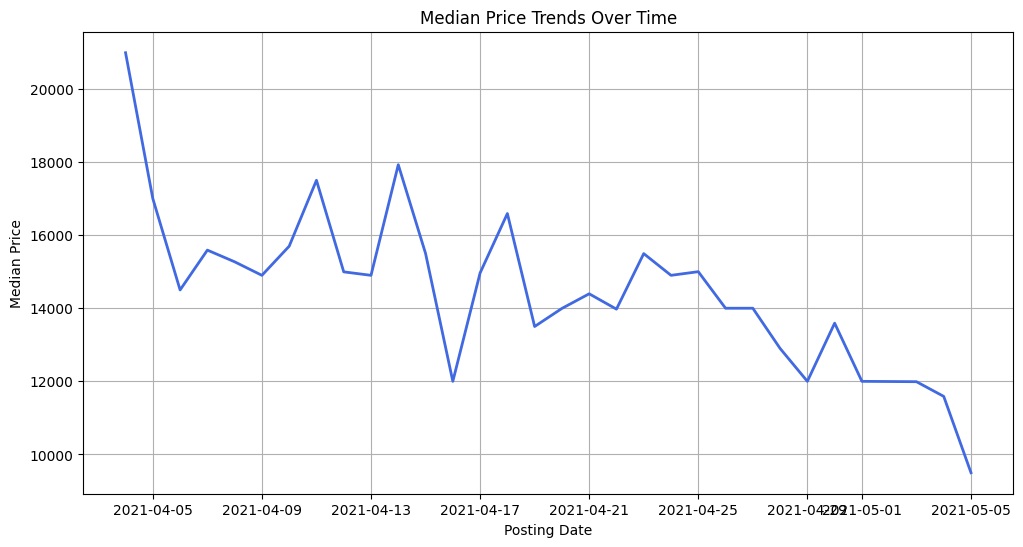

In [27]:
# Grouping by 'posting_date' and calculating the median price for each date
price_trend = df.groupby(pd.Grouper(key='posting_date', freq='D'))['price'].median()

# Creating a line plot to visualize the median price trends over time
plt.figure(figsize=(12, 6))
plt.plot(price_trend.index, price_trend.values, color='royalblue', linewidth=2)
plt.title('Median Price Trends Over Time')
plt.xlabel('Posting Date')
plt.ylabel('Median Price')
plt.grid(True)

plt.show()


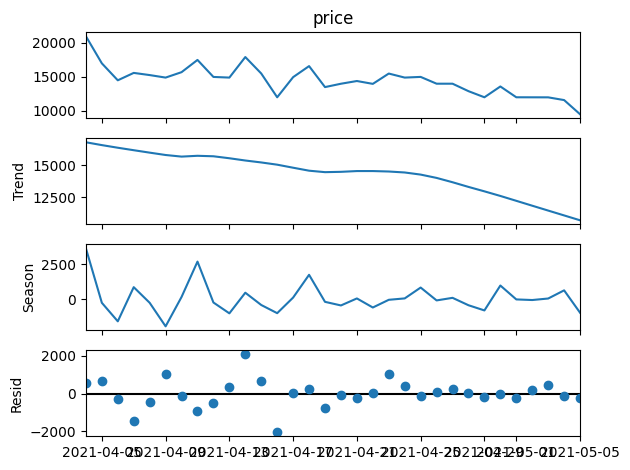

In [26]:
# Decomposing the time series into trend, seasonal, and residual components
stl = STL(price_trend, seasonal=13)  # Seasonal period (e.g., 13 for weekly data)
result = stl.fit()

# Plotting the decomposed components
result.plot()
plt.show()

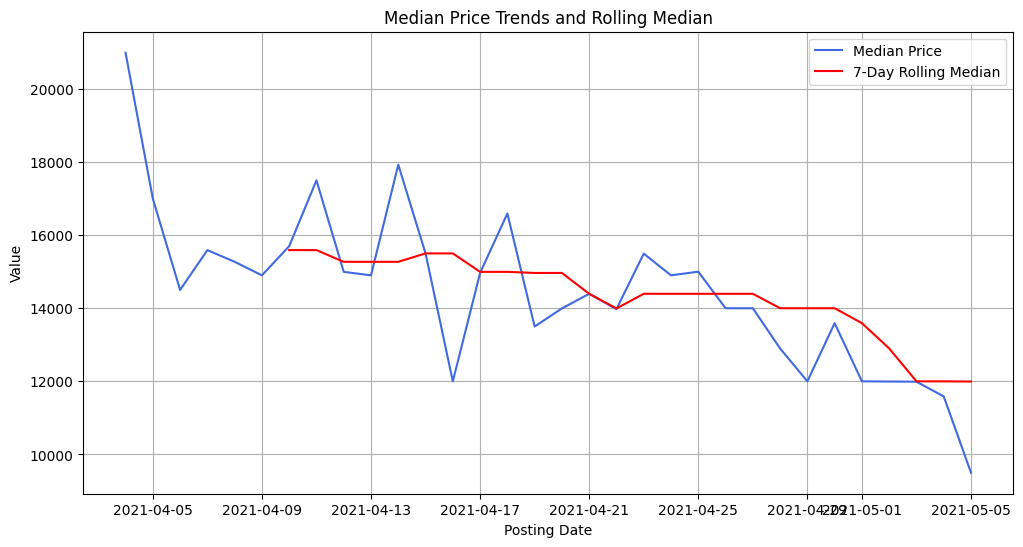

In [28]:
# Calculating the rolling median and rolling median absolute deviation
rolling_median = price_trend.rolling(window=7).median()  # 7-day rolling median

# Plotting the rolling median
plt.figure(figsize=(12, 6))
plt.plot(price_trend.index, price_trend.values, color='royalblue', label='Median Price')
plt.plot(rolling_median.index, rolling_median.values, color='red', label='7-Day Rolling Median')
plt.title('Median Price Trends and Rolling Median')
plt.xlabel('Posting Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
